## Girish Amar Budhrnai

In [4]:
# Importing the required libraries
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [5]:
# img_width contains the width of the image
# img_heigth contains the height of the image
# totl_pixels conatains the toyal pixels of the image i.e 256 * 256
# number_images contains the total number of iamges that are in out data set 

img_width = 256
img_height = 256
totl_pixels = img_width * img_height
number_images = len(os.listdir("./face_data/"))  

#### 1. Load the face images
#### 2. Flatten the face images 
#### 3. Combining all the flatten images

In [9]:
# vector stores the face vector of all the images
# Appending all the faceimages one by one in vector
# using cv2 converting the image to matrix and converting to gray scale as it doen't know that it is already in a gray scale
# and using matplotlib ploting the 1 image in the face vector
flatten_image = []
for filename in os.listdir("./face_data/"):
    
    image = cv2.imread("./face_data/" + filename)
    face_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    face_img = face_img.reshape(totl_pixels)
    flatten_image.append(face_img)
    
# asarray will covert vector to an array
flatten_image = np.asarray(flatten_image)
# print(flatten_image.shape)

#### 4. Splitting data to traning set and testing set

In [8]:
# Spliting the Images as 157 as a traning images and 20 as a testing images
train_vector = flatten_image[0:157,]
test_vector = flatten_image[157:,:]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

#### 5. Calcuating the mean (Normalizing)

In [5]:
# Calculating the Average of the traning vector and normalizing it.
avg_vector = train_vector.mean(axis = 0)
mean_image = train_vector - avg_vector

#### 6. Computing the convariance

In [6]:
covariance_face = np.dot(mean_image, mean_image.T)/train_vector.shape[0]

#### 7. Eigen decomposition

In [7]:
# np.linalg.eig will return us the eigen values and eigen vector
eigon_values , eigon_vectors = np.linalg.eig(covariance_face)

In [8]:
# Taking only 30 values from the eigen vectors i.e. as value of K is 30
k = 30

#### 8. Picking the top K eigen vectors

In [31]:
# Sorting the eigen values and eigen vector
temp = np .argsort(-eigon_values)
eigon_values = eigon_values [ temp ]
k_eigion_vector = eigon_vectors[temp,0:k]

#### 9. Calculating Eigon Faces

In [10]:
# Calculating eigen Faces by multiplying transpose of mean image and k eigen vectors
eigon_faces = np.dot(mean_image.T, k_eigion_vector)

#### 10. Normalizing Eigen Faces

In [20]:
# Normalizing eigen Faces using np.linalg.norm
eigon_face = np.zeros(eigon_faces.shape)
for i in range(30):
    eigon_temp = eigon_faces[:,i]
    eigon_face[:,i] = eigon_temp/np.linalg.norm(eigon_temp)

#### 11. Reshaping and Displaying eigen faces

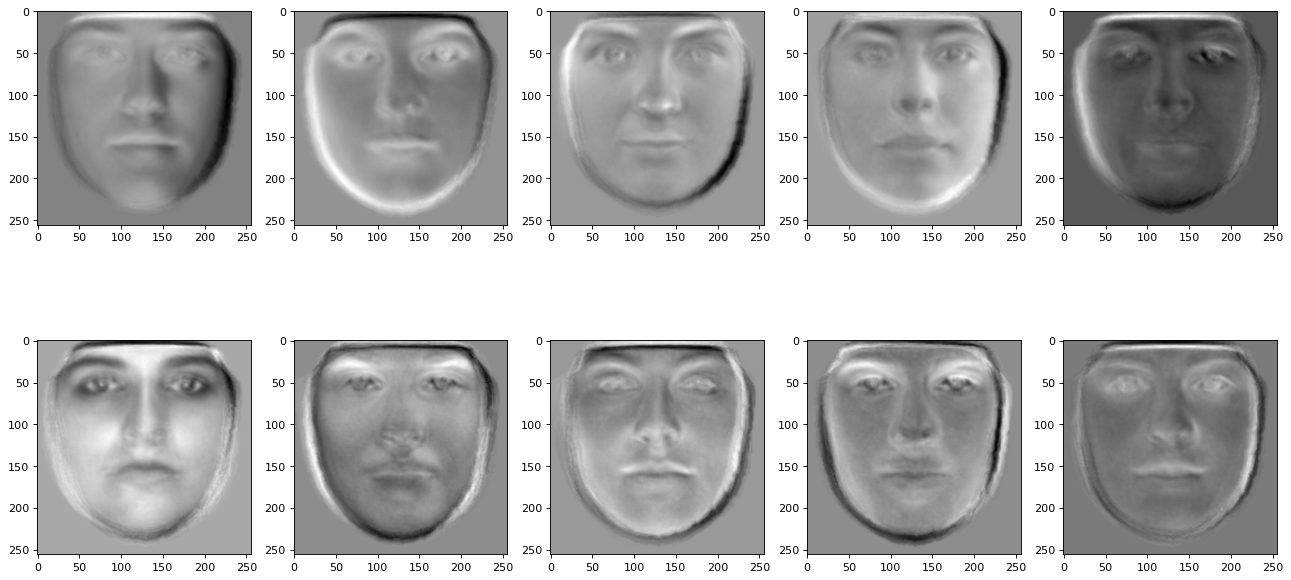

In [22]:
# Displaying normalized eigen faces
fig = plt.figure(figsize=(20, 10), dpi=80)
for i in range(1,11):
    fig.add_subplot(2, 5, i)
    plt.imshow(eigon_face[:,i-1].reshape(256,256), cmap = 'gray')

#### 12. Reconstructing images

In [23]:
# Calculating the average for test vector and normalizing it
normalize_test = test_vector - avg_vector
# Calculating weights and and center image to reconstruct the eigen faces
weight = np.dot(normalize_test,eigon_face)
center_image = np.dot(weight, eigon_face.T)
reconstruct_images = center_image + avg_vector

In [24]:
reconstruct_images.shape

(20, 65536)

#### 13. Reshaping and Displaying the Reconstructed faces

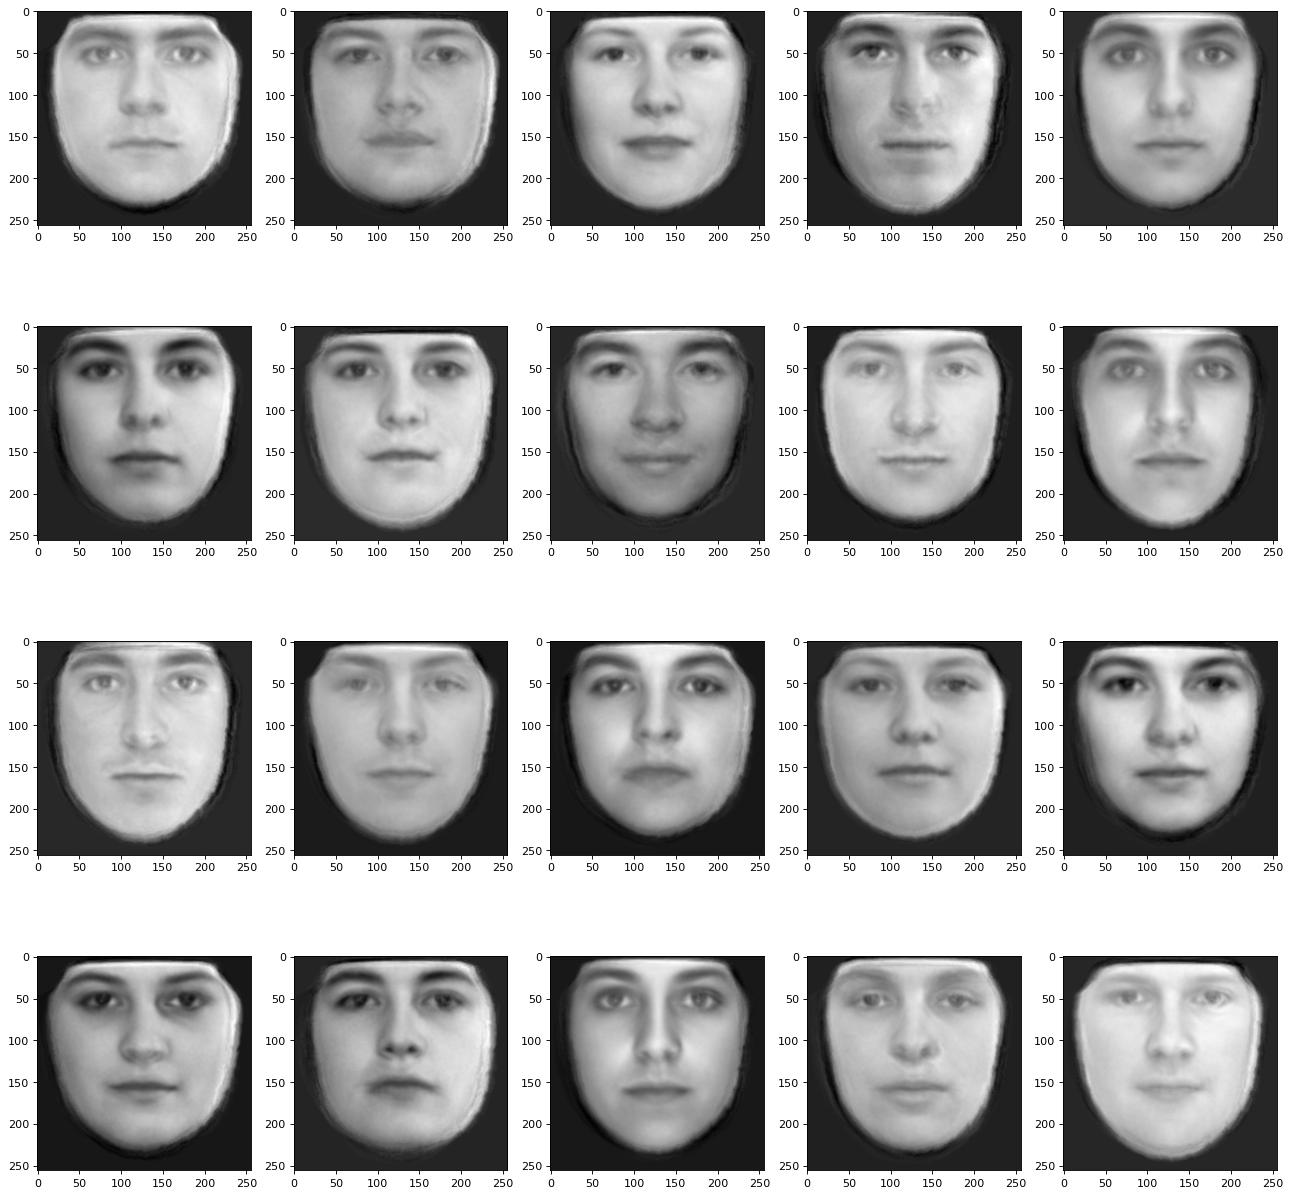

In [25]:
# Displaying the reconstructed eigon faces
fig = plt.figure(figsize=(20, 20), dpi=80)
for i in range(reconstruct_images.shape[0]):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(reconstruct_images[i].reshape(256,256),cmap = "gray")

#### 14. Calculating the Reconstruction error

In [28]:
reconstruct_error = (sum(sum(reconstruct_images - test_vector)**2))/ test_vector.shape[0]
print(f"Reconstruction for K = 30 is:- {reconstruct_error}")

Reconstruction for K = 30 is:- 17877947.77207269


#### 15. Trying different values for K

In [29]:
# Changing the value of K and calulating error for ach and every value change and storing it in the error_values and printing the error values
k_values = [10,20,30,40,50,100,120,145,150,157]
error_values=[]
for i in k_values:
    k = i
    temp = np .argsort(-eigon_values)
    eigon_values = eigon_values [ temp ]
    k_eigion_vector = eigon_vectors[temp,0:k]
    eigon_faces = np.dot(mean_image.T, k_eigion_vector)
    eigon_face = np.zeros(eigon_faces.shape)
    for j in range(i):
        eigon_temp = eigon_faces[:,j]
        eigon_face[:,j] = eigon_temp/np.linalg.norm(eigon_temp)
    normalize_test = test_vector - avg_vector
    weight = np.dot(normalize_test,eigon_face)
    center_image = np.dot(weight, eigon_face.T)
    reconstruct_images = center_image + avg_vector
    reconstruct_error = (sum(sum(reconstruct_images - test_vector)**2))/ test_vector.shape[0]
    print(f"Reconstruction for K = {i} is:- {reconstruct_error}")
    error_values = np.append(error_values, [reconstruct_error])

Reconstruction for K = 10 is:- 21654410.273137268
Reconstruction for K = 20 is:- 18894676.137434635
Reconstruction for K = 30 is:- 17877947.77207269
Reconstruction for K = 40 is:- 15848896.193108022
Reconstruction for K = 50 is:- 14822784.99284054
Reconstruction for K = 100 is:- 12762047.214329356
Reconstruction for K = 120 is:- 12534477.178120995
Reconstruction for K = 145 is:- 12143998.875114555
Reconstruction for K = 150 is:- 12068207.903956834
Reconstruction for K = 157 is:- 11909692.808024868


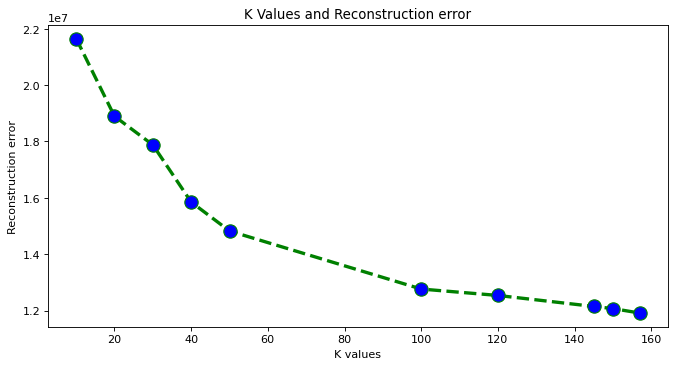

In [30]:
# PLoting the values
plt.figure(figsize=(10, 5), dpi=80)
# plt.plot(k_values, error_values)
plt.plot(k_values, error_values, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title("K Values and Reconstruction error")
plt.xlabel("K values")
plt.ylabel("Reconstruction error")
plt.show()